# Cost of Sea Level Rise Jupyter Notebook

#### **Collin Yates**, cayates2@ncsu.edu, and _200299698_. ####
#### **NR491 Fall 2022** *Final Project* ####
---

**Objectives:**

By the end of this exericse, you should be able to:

* Create an HTML page
* Host an interactive map (Leaflet) on GitHub Pages
* Create a storymap using Python, Leaflet, and CSV files

---

In this exercise, you will learn how to present spatial data in an interactive narrative similar to [ESRI StoryMaps](https://storymaps-classic.arcgis.com/en/gallery/#s=0) using open source products. You will learn how to host a live version of an HTML webpage on GitHub Pages.

<!-- If you double-click on the `raleigh.html` file in your folder, a map will open in your web browser. Next, let's open the `raleigh.html` file in **VS Code**. -->

This code is adapted from the `index.html` file from [this GitHub repository](https://github.com/HandsOnDataViz/leaflet-map-simple).

This exercise is an adaptation of the ["Leaflet Storymaps with Google Sheets" tutorial](https://handsondataviz.org/leaflet-storymaps-with-google-sheets.html) from the *Hands-On Data Visualization* book by Jack Dougherty & Ilya Ilyankou. The open-acess web edition of the book can be found [here](https://handsondataviz.org/).

Dougherty and Ilyankou developed Leaflet Storymaps with Google Sheets to create an open-source, easily migratable, story map tool. In this exercise, we are adapting their work with Google Sheets into using Python to create and edit CSVs to create the open-source storymap.

In [320]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import numpy as np

In [321]:
# Reading in Beaufort Shape and Beaufort CSV

beaufort = pd.read_csv('data/beaufort_stats_final.csv')

beaufort.head()

,OBJECTID,PIN,MAPNUM,BLOCK,PDOT,CONDO_,MOTHER,MAPNAM,PRID,PIN15,...,PLAT_BOOK,PLAT_PAGE,NEIGHBORHO,MUNICIPALI,SHAPESTAre,SHAPESTLen,_mean,_median,_minority,_majority
0,44452,NaN,NaN,NaN,3970,NaN,NaN,NaN,NaN,639500783970B21,...,10T,522,*******BLANK*******,Morehead City,4.330199e+01,30.000250,NaN,NaN,NaN,NaN
1,44695,RACHEL CARSON,6395.0,87.0,1531,NaN,0.0,6395.0,1101700101,639500871531000,...,NaN,NaN,BEAUFORT,Beaufort,3.914208e+06,20926.458041,1.385702,1.0,5.0,1.0
2,44812,63950021,0.0,0.0,2754,NaN,0.0,6395.0,1101700104,639500992754000,...,NaN,NaN,BEAUFORT,Beaufort,6.330864e+05,3118.469552,2.147504,2.0,4.0,2.0
3,45311,63962018,6396.0,90.0,3752,NaN,0.0,639620.0,1101700105,639620903752000,...,NaN,NaN,BEAUFORT,Beaufort,4.261146e+05,2612.327103,1.811045,2.0,3.0,2.0
4,45941,RACHEL CARSON,0.0,0.0,5377,NaN,0.0,6395.0,1101700102,639500985377000,...,NaN,NaN,BEAUFORT,Beaufort,1.492406e+06,7206.722696,1.572812,1.0,4.0,1.0


In [322]:
col_names = beaufort.columns.to_list()
col_names

['OBJECTID',
 'PIN',
 'MAPNUM',
 'BLOCK',
 'PDOT',
 'CONDO_',
 'MOTHER',
 'MAPNAM',
 'PRID',
 'PIN15',
 'WHAT',
 'DeedDate_2',
 'OWNER',
 'DBOOK',
 'DPAGE',
 'DDATE',
 'SALE_PRICE',
 'LAND_VALUE',
 'STRUC_VAL',
 'OTHER_VAL',
 'BLT_CONDO',
 'MAIL_APT',
 'MAIL_HOUSE',
 'MAIL_DIR',
 'MAIL_ST',
 'MAIL_STTYP',
 'MAIL_CITY',
 'MAIL_STATE',
 'MAIL_ZI4',
 'MAIL_ZI5',
 'MAIL_ADD2',
 'TOWNSHIP',
 'CITY_LIMIT',
 'NBHD',
 'FIRE_DIST',
 'RESCUE_DST',
 'LEGAL_DSC',
 'TOTAL_ACR',
 'Y_BLT_HOUS',
 'TOT_SQ_FT',
 'ROLL_TYPE',
 'BATHROOMS',
 'BEDROOMS',
 'SITE_HOUSE',
 'SITE_ST',
 'SITE_DIR',
 'SITE_STTYP',
 'SITE_APTNO',
 'SITE_CITY',
 'Expr1',
 'Total_EMV',
 'Use_Val',
 'Def_Val',
 'MAIL_APT_N',
 'CONDO_SQFT',
 'District',
 'CONDO_NUM',
 'Towns_Desc',
 'True_City',
 'Use_code',
 'Use_desc',
 'Perm_N1',
 'Perm_N2',
 'Perm_Ty1',
 'Perm_Ty2',
 'Perm_De1',
 'Perm_De2',
 'Perm_Is1',
 'Perm_Is2',
 'SCH_Dat1',
 'SCH_Dat2',
 'ACTL_DA1',
 'ACTL_DA2',
 'FondTyp1',
 'FondDes1',
 'FondTyp2',
 'FondDes2',
 'ExWllTyp

In [323]:
beaufort_eleval = beaufort.iloc[:, [17,18,19,111,112,114]]
beaufort_eleval

,LAND_VALUE,STRUC_VAL,OTHER_VAL,_mean,_median,_majority
0,0,0,42750,NaN,NaN,NaN
1,16174800,0,0,1.385702,1.0,1.0
2,1626600,1811390,151399,2.147504,2.0,2.0
3,1764000,1062362,19761,1.811045,2.0,2.0
4,6166800,0,0,1.572812,1.0,1.0
...,...,...,...,...,...,...
3924,39975,170162,2264,2.000000,2.0,2.0
3925,50211,258192,3473,2.010417,2.0,2.0
3926,43189,187735,9467,2.000000,2.0,2.0
3927,43707,246343,3935,1.971698,2.0,2.0


In [324]:
bev = beaufort_eleval

In [325]:
bev = bev[bev.LAND_VALUE != 0]
bev

,LAND_VALUE,STRUC_VAL,OTHER_VAL,_mean,_median,_majority
1,16174800,0,0,1.385702,1.0,1.0
2,1626600,1811390,151399,2.147504,2.0,2.0
3,1764000,1062362,19761,1.811045,2.0,2.0
4,6166800,0,0,1.572812,1.0,1.0
5,502947,206212,0,2.189474,2.0,2.0
...,...,...,...,...,...,...
3924,39975,170162,2264,2.000000,2.0,2.0
3925,50211,258192,3473,2.010417,2.0,2.0
3926,43189,187735,9467,2.000000,2.0,2.0
3927,43707,246343,3935,1.971698,2.0,2.0


In [326]:
bmed1 = bev.loc[bev["_median"] == 1,"LAND_VALUE"].sum() 

bmed2 = bev.loc[bev["_median"] == 2,"LAND_VALUE"].sum() 

bmed3 = bev.loc[bev["_median"] == 3,"LAND_VALUE"].sum() 

bmed4 = bev.loc[bev["_median"] == 4,"LAND_VALUE"].sum()

bmed5 = bev.loc[bev["_median"] == 5,"LAND_VALUE"].sum()

In [327]:
bmed1s = bev.loc[bev["_median"] == 1,"STRUC_VAL"].sum() 

bmed2s = bev.loc[bev["_median"] == 2,"STRUC_VAL"].sum() 

bmed3s = bev.loc[bev["_median"] == 3,"STRUC_VAL"].sum() 

bmed4s = bev.loc[bev["_median"] == 4,"STRUC_VAL"].sum()

bmed5s = bev.loc[bev["_median"] == 5,"STRUC_VAL"].sum()

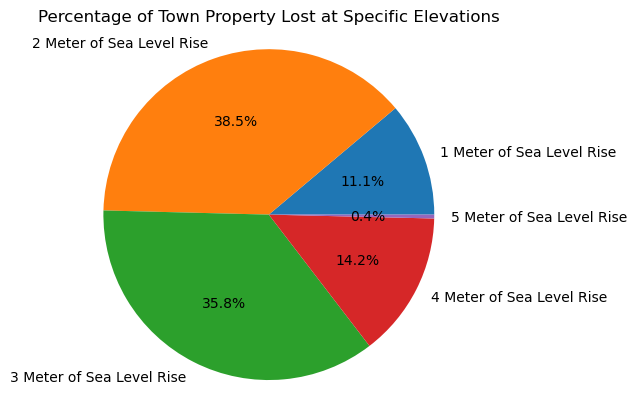

In [328]:
land_data = [bmed1,bmed2,bmed3,bmed4,bmed5]
land_label = ["1 Meter of Sea Level Rise","2 Meter of Sea Level Rise","3 Meter of Sea Level Rise","4 Meter of Sea Level Rise","5 Meter of Sea Level Rise"]
plt.pie(land_data, labels=land_label, autopct= '%1.1f%%')
plt.title("Percentage of Town Property Lost at Specific Elevations")
plt.axis('equal')
plt.show

save_results_to = 'media/'
plt.savefig(save_results_to + 'proploss.png', dpi = 300)

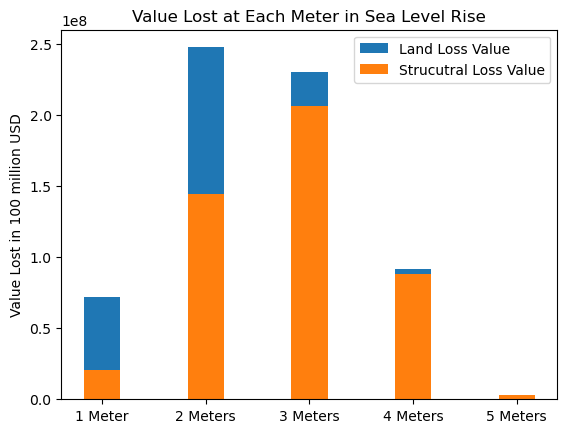

<Figure size 640x480 with 0 Axes>

In [357]:
labels = ['1 Meter', '2 Meters', '3 Meters', '4 Meters', '5 Meters']
land_med = [bmed1,bmed2,bmed3,bmed4,bmed5]
struc_med = [bmed1s, bmed2s, bmed3s, bmed4s, bmed5s]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, land_med, width, label='Land Loss Value')
ax.bar(labels, struc_med, width, label='Strucutral Loss Value')

ax.set_ylabel('Value Lost in 100 million USD')
ax.set_title('Value Lost at Each Meter in Sea Level Rise')
ax.legend()

plt.show()

save_results_to = 'media/'
plt.savefig(save_results_to + 'struclanloss.png', dpi = 300)

### Host a Live Leaflet Map on GitHub Pages

In order to host your storymap on the internet, you need to create a GitHub repository for this project. The best way to do this is to **fork** the leaflet-storymap-nr491 repo from [this repo](https://github.com/mdgaines/leaflet-storymap-nr491) on my (Mollie Gaines') GitHub.

Go to Settings > Pages and set Branch to `main` and save.

Edit your README.md to have the link to your new repo.

### Leaflet Storymap with CSVs

We are now going to start working on our Leaflet Storymap by building several `pandas dataframes` which we can save as a CSVs.

Our storymap will have a scrolling narrative that follows points along our map. You will learn how to add images, audio and video files, and different map backgrounds. 

We will build an in-class storymap to looking at different colleges and universities in Wake County.

In [330]:
import pandas as pd
import geopandas as gpd
import os
import folium
import csv

First, we will create an `Options.csv` file and save it in our `csv/` directory. We will create this CSV to look like the **Options** tab in the Google Sheet from the HODV exercise.

![GS_Options](./imgs/gs_options.PNG)

In [331]:
# Create lists for each row we are writing in our csv
header = ['Setting', 'Customize', 'Hints']
info = ['Storymap Info', '', \
    'For help, see tutorial in [HandsOnDataViz.org](https://handsondataviz.org/leaflet-storymaps-with-google-sheets.html)']
title = ['Storymap Title', 'NR491 Cost of Sea Level Rise', '']
subtitle = ['Storymap Subtitle', \
    "Measuring the Economic Impact of Sea Level Rise on Local North Carolina Community<br><small>Scroll down<i class='fafa-chevron-down'></i></small>",\
    "Add your subtitle, or delete that portion"]
logo = ['Storymap Logo', 'media/ncsu_logo.jpg', 'Path to a logo image']
google_analysis = ['Google Analytics Tracking ID', '', 'Sample format: UA-5488840-29']

map_settings = ['Map Settings', '', '']
basemap_tiles = ['Basemap Tiles', 'CartoDB.Positron',\
    '[Drop-down menu for background basemap tiles](https://leaflet-extras.github.io/leaflet-providers/preview/)']
zoom = ['Zoom Controls', 'bottomright', '']
bg_color = ['Narrative Background Color', '', '']
txt_color = ['Narrative Text Color', '', '']
lnk_color = ['Narrative Link Color', '', '']
ch_color = ['Active Chapter Background Color','','']
media_height = ['Media Container Height','300',\
    'Maximum height of the image, in pixels. 200 is default. The image will be fit into the container with its proportions kept (it won\'t be skewed).']
pixels_after_char = ['Pixels After Final Chapter','600','In pixels, at least 100']
lightbox_imgs = ['Enable Lightbox for Images','yes','yes or no']

creds = ['Credits','','']
auth_name = ['Author Name','Collin Yates','Appears in map credits as "View data by..." (or leave blank)']
auth_email = ['Author Email or Website','','Create link in Author Name by inserting your email or web address (or leave blank)']
auth_GH = ['Author GitHub Repo Link','https://github.com/handsondataviz/leaflet-storymaps-with-google-sheets',\
    'Insert your code repo URL to appear as link in "View code..." (or leave blank)']
code_cred = ['Code Credit','<a href="https://handsondataviz.org">HandsOnDataViz</a>',\
    'Appears in credits as "...code by..." (or leave blank)']

**NOTE:** you can have several different basemap tiles that will appear in the background. 
The options we will look at are:

![Basemaps](./imgs/gs_basemap_tiles.PNG)

We can also choose where on our map we put our zoom controls. The options are:

![zoom](./imgs/gs_zoom.PNG)

Now, we'll write our first CSV.

In [332]:
# Check that the csv directory exists
if not os.path.exists('./csv'):
    os.mkdir('./csv')

# Create a new Options.csv

# opens a csv file in write mode
# the wuth statement makes sure the file closes properly when we're done
with open('./csv/Options_Template.csv', 'w', newline='') as options:
    # create the csv writer
    writer = csv.writer(options)

    # write a row to the csv file
    writer.writerow(header)

    writer.writerow(info)
    writer.writerow(title)
    writer.writerow(subtitle)
    writer.writerow(logo)
    writer.writerow(google_analysis)

    writer.writerow(map_settings)
    writer.writerow(basemap_tiles)
    writer.writerow(zoom)
    writer.writerow(bg_color)
    writer.writerow(txt_color)
    writer.writerow(lnk_color)
    writer.writerow(ch_color)
    writer.writerow(media_height)
    writer.writerow(pixels_after_char)
    writer.writerow(lightbox_imgs)

    writer.writerow(creds)
    writer.writerow(auth_name)
    writer.writerow(auth_email)
    writer.writerow(auth_GH)
    writer.writerow(code_cred)


Now that we've saved our CSV, we will read it in as a Pandas DataFrame and make some edits so it is personalized for us.

**Note:** We could have written our original CSV with all the information we wanted, however now we can practice making edits.

In [333]:
# read in the options csv as a data frame
options_df = pd.read_csv('./csv/Options_Template.csv', index_col=0)
options_df

,Customize,Hints
Setting,,
Storymap Info,NaN,"For help, see tutorial in [HandsOnDataViz.org]..."
Storymap Title,NR491 Cost of Sea Level Rise,NaN
Storymap Subtitle,Measuring the Economic Impact of Sea Level Ris...,"Add your subtitle, or delete that portion"
Storymap Logo,media/ncsu_logo.jpg,Path to a logo image
Google Analytics Tracking ID,NaN,Sample format: UA-5488840-29
Map Settings,NaN,NaN
Basemap Tiles,CartoDB.Positron,[Drop-down menu for background basemap tiles](...
Zoom Controls,bottomright,NaN
Narrative Background Color,NaN,NaN


In [334]:
# we will index to the specific entry we want to edit using df[col][row] indexing.
# we read in the df with the first column as our index to make this easier for ourselves

# here, we are changing the background color of our narative bar
options_df['Customize']['Narrative Background Color'] = 'lightgray'

options_df

,Customize,Hints
Setting,,
Storymap Info,NaN,"For help, see tutorial in [HandsOnDataViz.org]..."
Storymap Title,NR491 Cost of Sea Level Rise,NaN
Storymap Subtitle,Measuring the Economic Impact of Sea Level Ris...,"Add your subtitle, or delete that portion"
Storymap Logo,media/ncsu_logo.jpg,Path to a logo image
Google Analytics Tracking ID,NaN,Sample format: UA-5488840-29
Map Settings,NaN,NaN
Basemap Tiles,CartoDB.Positron,[Drop-down menu for background basemap tiles](...
Zoom Controls,bottomright,NaN
Narrative Background Color,lightgray,NaN


In [335]:
# Next, make edits to the Author Name and Author Github Repo Link so it has your information
options_df['Customize']['Author Name'] = 'Collin Yates'
options_df['Customize']['Author GitHub Repo Link'] = 'https://github.com/cayates2/Final-Project-nr491'
options_df['Customize']['Storymap Title'] = 'The Cost of Sea Level Rise'
options_df['Customize']['Storymap Subtitle'] = 'Story map discussing sea level rise and its economic impact on local communities in North Carolina'
# save your options df as Options.csv

options_df.to_csv('./csv/Options.csv')


Now let's checkout what our index.html file looks like so far.

In [336]:
options_df

,Customize,Hints
Setting,,
Storymap Info,NaN,"For help, see tutorial in [HandsOnDataViz.org]..."
Storymap Title,The Cost of Sea Level Rise,NaN
Storymap Subtitle,Story map discussing sea level rise and its ec...,"Add your subtitle, or delete that portion"
Storymap Logo,media/ncsu_logo.jpg,Path to a logo image
Google Analytics Tracking ID,NaN,Sample format: UA-5488840-29
Map Settings,NaN,NaN
Basemap Tiles,CartoDB.Positron,[Drop-down menu for background basemap tiles](...
Zoom Controls,bottomright,NaN
Narrative Background Color,lightgray,NaN


### Chapters

We will add content to our map by creating a `Chapters.csv`.

However, first we will look through our data to get the information we are interested in.

Now, let's read in some of our spatial data.

In [337]:
# Filepaths

beaufort_plots_path = './data/Zonal_Stats_Beaufort/Zonal_Stats_Beaufort.shp'


beaufort_plots = gpd.read_file(beaufort_plots_path)


print(beaufort_plots.crs)


epsg:2264


In [338]:
# Reproject to WGS84
# nc_colleges_wgs84 = nc_colleges.to_crs(epsg=4326)
# nc_amtrak_stations_wgs84 = nc_amtrak_stations.to_crs(epsg=4326)

beaufort_plots_wgs84 = beaufort_plots.to_crs(epsg=4326)

# Create a Geo-id which is needed by the Folium (it needs to have a unique identifier for each row)
# nc_colleges_wgs84['geoid'] = nc_colleges_wgs84.index.astype(str)
# nc_amtrak_stations_wgs84['geoid'] = nc_amtrak_stations_wgs84.index.astype(str)

beaufort_plots_wgs84['geoid'] = beaufort_plots_wgs84.index.astype(str)

We can use the `folium` package to see what our Leaflet map will look like.

In [339]:
# Create a Map instance centered on Raleigh
m = folium.Map(location=[35.4567, -48.2239], zoom_start=5, control_scale=True)
m

In [340]:
# Map_Locations = pd.read_csv('./csv/Map_Locations.csv')

In [341]:
# Show the colleges on the map

# Create college points on top of the map
#for idx, row in Map_Locations.iterrows():
    # Get lat and lon of points
   # lon = row['x']
   # lat = row['y']

    # Get college information
   # college_name = row['NAME']

    #Add markers to the map
   # folium.Marker([lat,lon], popup=college_name).add_to(m)

m

In [342]:
chapters_df = pd.read_csv('./csv/Chapters_Project.csv')
chapters_df

,Unnamed: 0,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,0,Overview of Atlantic,media/gulf_stream.png,Source: USGS,https://www.usgs.gov/media/images/map-north-at...,This is a test.,3.0,Hidden,NaN,North Atlantic,35.503600,-69.423450,NaN,NaN,NaN,NaN
1,1,North Carolina,media/peace.jpg,Image Source: Niche,https://www.niche.com/colleges/william-peace-u...,William Peace University is a private college ...,16.0,Plain,blue,15 E PEACE ST,35.788240,-78.637376,NaN,NaN,NaN,NaN
2,2,Beaufort,NaN,NaN,NaN,NaN,16.0,Plain,blue,118 E SOUTH ST,35.771817,-78.637986,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
# chapter_df = pd.read_csv('./csv/Chapters.csv')
# chapter_df

chapter_df = pd.read_csv('./csv/Chapters_Project.csv')

chapter_df

,Unnamed: 0,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,0,Overview of Atlantic,media/gulf_stream.png,Source: USGS,https://www.usgs.gov/media/images/map-north-at...,This is a test.,3.0,Hidden,NaN,North Atlantic,35.503600,-69.423450,NaN,NaN,NaN,NaN
1,1,North Carolina,media/peace.jpg,Image Source: Niche,https://www.niche.com/colleges/william-peace-u...,William Peace University is a private college ...,16.0,Plain,blue,15 E PEACE ST,35.788240,-78.637376,NaN,NaN,NaN,NaN
2,2,Beaufort,NaN,NaN,NaN,NaN,16.0,Plain,blue,118 E SOUTH ST,35.771817,-78.637986,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our first chapter will give a brief overview of Raleigh. We will include a fun skyline image with a link to where we got the image (the Raleigh government webpage). Our map will show a historical, georeferenced map of the Raleigh City Plan from 1834 along with blue markers for each of the 8 schools we will look at for chapters.

To include images in our narative, we need to have them downloaded to our `media` directory.

In [344]:
chapter_df.columns

Index(['Unnamed: 0', 'Chapter', 'Media Link', 'Media Credit',
       'Media Credit Link', 'Description', 'Zoom', 'Marker', 'Marker Color',
       'Location', 'Latitude', 'Longitude', 'Overlay', 'Overlay Transparency',
       'GeoJSON Overlay', 'GeoJSON Feature Properties'],
      dtype='object')

In [345]:
chapter_df

,Unnamed: 0,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,0,Overview of Atlantic,media/gulf_stream.png,Source: USGS,https://www.usgs.gov/media/images/map-north-at...,This is a test.,3.0,Hidden,NaN,North Atlantic,35.503600,-69.423450,NaN,NaN,NaN,NaN
1,1,North Carolina,media/peace.jpg,Image Source: Niche,https://www.niche.com/colleges/william-peace-u...,William Peace University is a private college ...,16.0,Plain,blue,15 E PEACE ST,35.788240,-78.637376,NaN,NaN,NaN,NaN
2,2,Beaufort,NaN,NaN,NaN,NaN,16.0,Plain,blue,118 E SOUTH ST,35.771817,-78.637986,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, let's save this to a CSV and see how this changes our storymap.

In [346]:
chapter_df.to_csv('./csv/Chapters.csv')

We have a map! We also have some images, links, and narrative text appearing.

Now, let's add a new image and image source information for Peace College.

In [347]:
chapters_df.columns

Index(['Unnamed: 0', 'Chapter', 'Media Link', 'Media Credit',
       'Media Credit Link', 'Description', 'Zoom', 'Marker', 'Marker Color',
       'Location', 'Latitude', 'Longitude', 'Overlay', 'Overlay Transparency',
       'GeoJSON Overlay', 'GeoJSON Feature Properties'],
      dtype='object')

Before European colonization, the Raleigh area was home to indigenous \
    tribes including the Tuscarora and Occaneechi. Sir Walter Raleigh, among others, funded a group of colonists \
    to establish the <em>Cittie of Raleigh</em>. These colonists landed on Roanoke Island in <b>1587</b> and \
    later became known as the "Lost Colony" after the settlement was found abandonded in 1590. In <b>1770</b> \
    the General Assembly created Wake County. In <b>1792</b>, Raleigh was founded as the state capital of North Carolina.

In [348]:
chapter_df.loc[1, "Chapter"] = "Effects on North Carolina"
chapter_df.loc[1, "Media Link"] = "media/wilm_chang.png"
chapter_df.loc[1, "Media Credit"] = "sealevelrise.org"
chapter_df.loc[1, "Media Credit Link"] = "https://sealevelrise.org/states/north-carolina/#:~:text=And%20It's%20Costing%20Over%20%242%20Billion&text=This%20increase%20is%20mostly%20due,and%20vulnerability%20to%20coastal%20storms."
chapter_df.loc[1, "Description"] = "With this abnormal amount of water being pushed towards the east coast, major cities and towns on the coast have had to deal with an increased rate of sea level rise over the past few years. From the graph displayed, it depicts the City of Wilmington's rise in sea level. Since 1950, there has been a dramatic increase, with over an 11 inch rise in water levels."
chapter_df.loc[1, "Zoom"] = "10"
chapter_df.loc[1, "Marker"] = "plain"
chapter_df.loc[1, "Marker Color"] = "blue"
chapter_df.loc[1, "Location"] = "Wilmington, NC"
chapter_df.loc[1, "Latitude"] = "34.20860292498924"
chapter_df.loc[1, "Longitude"] = "-77.89353114975715"

In [349]:
chapter_df.loc[2, "Chapter"] = "Increase in Abnormal Flood Events"
chapter_df.loc[2, "Media Link"] = "media/sun_flood.jpg"
chapter_df.loc[2, "Media Credit"] = "UNC Chapel Hill"
chapter_df.loc[2, "Media Credit Link"] = "https://tarheels.live/sunnydayflood/"
chapter_df.loc[2, "Description"] = ""
chapter_df.loc[2, "Zoom"] = "16"
chapter_df.loc[2, "Marker"] = "plain"
chapter_df.loc[2, "Marker Color"] = "blue"
chapter_df.loc[2, "Location"] = "Beaufort, NC"
chapter_df.loc[2, "Latitude"] = "34.716181939999245"
chapter_df.loc[2, "Longitude"] = "-76.6643659403665"

In [350]:
chapter_df.loc[3, "Chapter"] = "Beaufort Sea Level Rise Trends"
chapter_df.loc[3, "Media Link"] = "media/beaufort_change.png"
chapter_df.loc[3, "Media Credit"] = "sealevelrise.org"
chapter_df.loc[3, "Media Credit Link"] = "https://sealevelrise.org/states/north-carolina/#:~:text=And%20It's%20Costing%20Over%20%242%20Billion&text=This%20increase%20is%20mostly%20due,and%20vulnerability%20to%20coastal%20storms."
chapter_df.loc[3, "Description"] = ""
chapter_df.loc[3, "Zoom"] = "16"
chapter_df.loc[3, "Marker"] = "plain"
chapter_df.loc[3, "Marker Color"] = "blue"
chapter_df.loc[3, "Location"] = "Beaufort, NC"
chapter_df.loc[3, "Latitude"] = "34.72380029408167"
chapter_df.loc[3, "Longitude"] = "-76.64916985713339"

In [351]:
chapter_df.loc[4, "Chapter"] = ""
chapter_df.loc[4, "Media Link"] = ""
chapter_df.loc[4, "Media Credit"] = ""
chapter_df.loc[4, "Media Credit Link"] = ""
chapter_df.loc[4, "Description"] = ""
chapter_df.loc[4, "Zoom"] = ""
chapter_df.loc[4, "Marker"] = ""
chapter_df.loc[4, "Marker Color"] = ""
chapter_df.loc[4, "Location"] = ""
chapter_df.loc[4, "Latitude"] = ""
chapter_df.loc[4, "Longitude"] = ""

In [352]:
chapter_df.to_csv('./csv/Chapters.csv')

In [353]:
# Check our work
chapter_df.head()

,Unnamed: 0,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,0.0,Overview of Atlantic,media/gulf_stream.png,Source: USGS,https://www.usgs.gov/media/images/map-north-at...,This is a test.,3.0,Hidden,NaN,North Atlantic,35.5036,-69.42345,NaN,NaN,NaN,NaN
1,1.0,Effects on North Carolina,media/wilm_chang.png,sealevelrise.org,https://sealevelrise.org/states/north-carolina...,With this abnormal amount of water being pushe...,10,plain,blue,"Wilmington, NC",34.20860292498924,-77.89353114975715,NaN,NaN,NaN,NaN
2,2.0,Increase in Abnormal Flood Events,media/sun_flood.jpg,UNC Chapel Hill,https://tarheels.live/sunnydayflood/,,16,plain,blue,"Beaufort, NC",34.716181939999245,-76.6643659403665,NaN,NaN,NaN,NaN
3,3.0,Beaufort Sea Level Rise Trends,media/beaufort_change.png,sealevelrise.org,https://sealevelrise.org/states/north-carolina...,,16,plain,blue,"Beaufort, NC",34.72380029408167,-76.64916985713339,NaN,NaN,NaN,NaN
4,NaN,,,,,,,,,,,,NaN,NaN,NaN,NaN


Let's look at our `index.html` again. What has changed? Does it look the way you expect?

### Overlay GeoJSON

Next, we'll add a GeoJSON file to our map. Leaflet uses GeoJSONs instead of Shapefiles. If you mostly use Shapefiles, just open them into QGIS and save them as GeoJSONs to get them ready for the storymap.

All of our GeoJSONs need be saved in the `geojson` folder.

**Important:** Your GeoJSON files **MUST** be in a recognized projection and have a `"crs"` attribute. *It will be easiest for you if they are all in the same CRS.*

Let's add our GeoJSON of NC State's campuses.

In [354]:
#chapter_df.loc[4, "GeoJSON Overlay"] = "geojson/NCSU_campuses.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
#chapter_df.loc[4, "GeoJSON Feature Properties"] = "fillColor:red;color:black"

# save the Chapters.csv and look at the index.html file
#chapter_df.to_csv('./csv/Chapters.csv')

To change a specific campus color, we will need to edit the GeoJSON itself.

*NOTE: I am working on integrating another set of Leaflet code so that you will not have to manually edit the GeoJSON files, but it's not ready yet.*

To edit the GeoJSON file, open it with a text-editor (like Notepad) or in VS Code. Use `ctrl+f` to find `"properties"`. GeoJSON files are essentially full of dictionaries. After the `"Precinct_N"` key:value pair, add `"fillColor": "blue",` and save your changes.

Refresh your `index.html`. Do you see any changes? (Note: it can take a while for changes to be fully processed. Make sure everything is saved.)

In [355]:
# Add Wake county census tracts to your map for a chapter of your choice


# Try to change the census tract for the school in your chapter to a different color

Now, let's add another historic map of Raleigh. Go to https://mapwarper.net/ and put "raleigh" in the search bar. Select "Rectified maps only" and search. 

Look through the maps and find one you want to use. Click on the "Export" tab at the top and copy the link from the "Tiles (Google/OSM scheme):" option.

<!-- https://mapwarper.net/maps/tile/44859/{z}/{x}/{y}.png -->

In [356]:
# Add this link to the Overlay column to a chapter of your choice
# remember, if the historical map does not overlap with the school for that chapter, 
# we will need to manually zoom out to see it or change our zoom settings



Try adding new images, text, vidoes, and GeoJSON files to different chapters. 
Remember to add the data we are adding to their respective folders.